# Try using Keras

### Imports

In [1]:
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

Using TensorFlow backend.


### Read the dataframe

In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test= pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [3]:
#Define the target and the features
x_train = train.drop(columns=['label'])
y_train = train.label

x_test = test.drop(columns=['label'])
y_test = test.label

In [4]:
#Print the shape of target
y_train.shape , y_test.shape

((60000,), (10000,))

In [5]:
#Print the number of class in the train target
list(y_train.unique())

[2, 9, 6, 0, 3, 4, 5, 8, 7, 1]

In [6]:
#Print the number of class in the test target
list(y_test.unique())

[0, 1, 2, 3, 8, 6, 5, 4, 7, 9]

### Scale Pixel image
First off all, let's identify that the max number in pixel image

So, after that I'll divide the target by this number to scale the target in this model

In [7]:
x_train.max().sort_values().tail(1)

pixel392    255
dtype: int64

In [8]:
x_test.max().sort_values().tail(1)

pixel396    255
dtype: int64

In [9]:
#The max number is 255, so lets divide the target by this number
x_train = x_train/255
x_test = x_test/255

### Transform features in float
After scaling the target let's transform the feature in float in order to reduce the risk of It converting in integer number 

In [10]:
x_train = x_train.astype(float) 
x_test = x_test.astype(float)

In [11]:
#Finally, lets get dummies of the target using the function presents in keras
from keras.utils import to_categorical

y_train = to_categorical(y_train,10) #10 levels of image
y_test =  to_categorical(y_test,10) #10 levels of image

### Applying Deep learning model to predict the image

In [12]:
#Starting a neural network
modelo = Sequential()

#Input the first layer in model with 50 neurals and the activation function will be Relu
modelo.add(Dense(50 #number os neurals
                ,activation = 'relu' #activation function
                ,input_shape = (784,) #Number of features in dataframe, let's pay attention, because keras need to receive a tuple, its the reason of (784,0)
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)
                ))

#Input the second layer in model with 50 neurals and the same activation function
modelo.add(Dense(30 
                ,activation = 'relu' 
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) 
                ))

#Input the third layer in model with 20 neurals and the same activation function
modelo.add(Dense(20
                ,activation = 'relu' 
                ,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01) 
                ))

#The final layes will be with 10 neurals because we have 10 class in this dataframe
#The activation function is softmax because its will be normalize the output of neurals and it will be easier identify the probably of each class
modelo.add(Dense(10 #numero de classs
                ,activation = 'softmax' #Vai normaliza as probabilidades por exponencial
                ))

#Finally, lets see the summary of the model and see how many parameters its have.
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 41,610
Trainable params: 41,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
#I use the croos entropy, because its penalty high error for bad clasification and a loss error for good erro, its a commum metric using in classification problems
modelo.compile(
                loss='categorical_crossentropy' 
               ,optimizer='adam' 
               ,metrics=['accuracy'] )

In [14]:
history = modelo.fit(x_train,y_train
         ,epochs=30 #number of times that model will through in train 
         ,batch_size = 128 #number of rows that will be consider to update the weights of layers
         ,verbose = 1
         ,validation_data=(x_test,y_test)
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 44us/step - loss: 1.3631 - accuracy: 0.7281 - val_loss: 0.9621 - val_accuracy: 0.7965
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.8914 - accuracy: 0.8072 - val_loss: 0.8503 - val_accuracy: 0.8142
Epoch 3/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.8275 - accuracy: 0.8164 - val_loss: 0.7946 - val_accuracy: 0.8229
Epoch 4/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.7881 - accuracy: 0.8209 - val_loss: 0.7674 - val_accuracy: 0.8298
Epoch 5/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.7601 - accuracy: 0.8250 - val_loss: 0.7547 - val_accuracy: 0.8259
Epoch 6/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.7375 - accuracy: 0.8287 - val_loss: 0.7406 - val_accuracy: 0.8255
Epoch 7/30
60000/60000 [==============================] - 2s 38us/st

In [15]:
#Print loss and accuracy
modelo.evaluate(x_test,y_test,verbose = 0)

[0.5787572590827942, 0.8539000153541565]

### PLotting the accuracy and loss during the increment of epochs

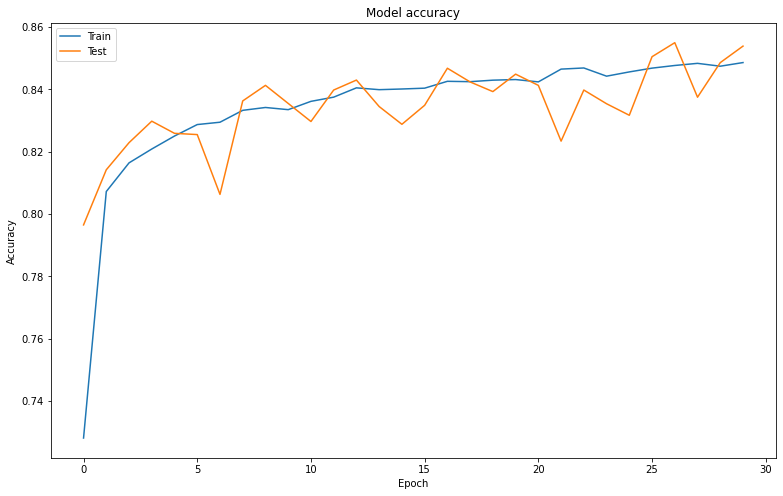

In [16]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

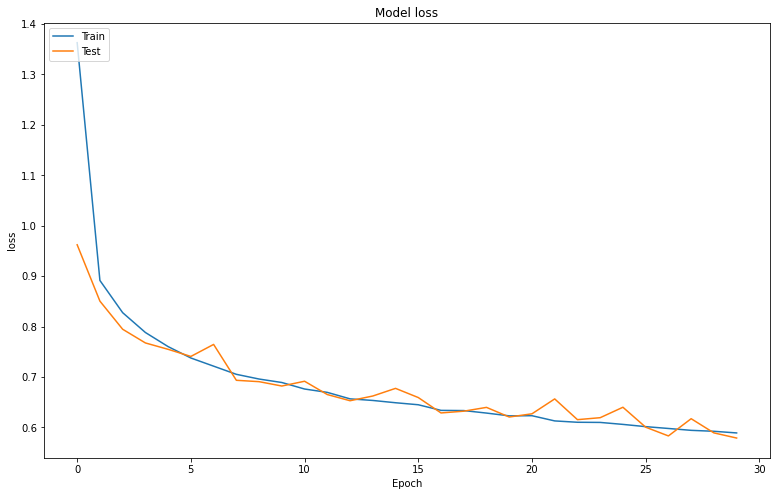

In [17]:
plt.subplots(figsize=(13, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Classification report of each class

In [18]:
#Predict the x_test
p = modelo.predict(x_test)
p = (p > 0.5)
print('ACC: %.3f%%' % (accuracy_score(y_test, p)*100))
print('---------')
print(classification_report(y_test, p))

ACC: 80.380%
---------
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1000
           1       0.99      0.96      0.97      1000
           2       0.84      0.66      0.74      1000
           3       0.91      0.82      0.86      1000
           4       0.86      0.64      0.73      1000
           5       0.94      0.91      0.92      1000
           6       0.74      0.51      0.60      1000
           7       0.91      0.90      0.91      1000
           8       0.96      0.94      0.95      1000
           9       0.94      0.92      0.93      1000

   micro avg       0.89      0.80      0.85     10000
   macro avg       0.89      0.80      0.84     10000
weighted avg       0.89      0.80      0.84     10000
 samples avg       0.80      0.80      0.80     10000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Try to do the same model in Scikit-learn

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,30,20) #define 3 layers with 50, 30 and 20 neurals
                      , batch_size=32 #Define the same bacth_size
                      , solver = 'adam' #Define the optimization
                      ,activation='relu' #Activation function
                      , max_iter=30 #Number of epochs
                      ,verbose=1
                      , random_state=42)

model.fit(x_train, y_train)

Iteration 1, loss = 1.16751323
Iteration 2, loss = 0.73055040
Iteration 3, loss = 0.66297888
Iteration 4, loss = 0.62398755
Iteration 5, loss = 0.59599158
Iteration 6, loss = 0.57648485
Iteration 7, loss = 0.55670148
Iteration 8, loss = 0.53980763
Iteration 9, loss = 0.52693651
Iteration 10, loss = 0.51314798
Iteration 11, loss = 0.50228346
Iteration 12, loss = 0.49314415
Iteration 13, loss = 0.48015815
Iteration 14, loss = 0.47619853
Iteration 15, loss = 0.46789987
Iteration 16, loss = 0.46192088
Iteration 17, loss = 0.45247878
Iteration 18, loss = 0.44406509
Iteration 19, loss = 0.43771446
Iteration 20, loss = 0.43211326
Iteration 21, loss = 0.42776855
Iteration 22, loss = 0.41946926
Iteration 23, loss = 0.41856413
Iteration 24, loss = 0.41319356
Iteration 25, loss = 0.40686743
Iteration 26, loss = 0.40019588
Iteration 27, loss = 0.39966402
Iteration 28, loss = 0.39747053
Iteration 29, loss = 0.39105230
Iteration 30, loss = 0.38643915


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=30,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=1, warm_start=False)

In [20]:
#Print the accuracy
print('Accuracy:', model.score(x_test, y_test))

Accuracy: 0.8652


### PLotting the loss during the increment of epochs

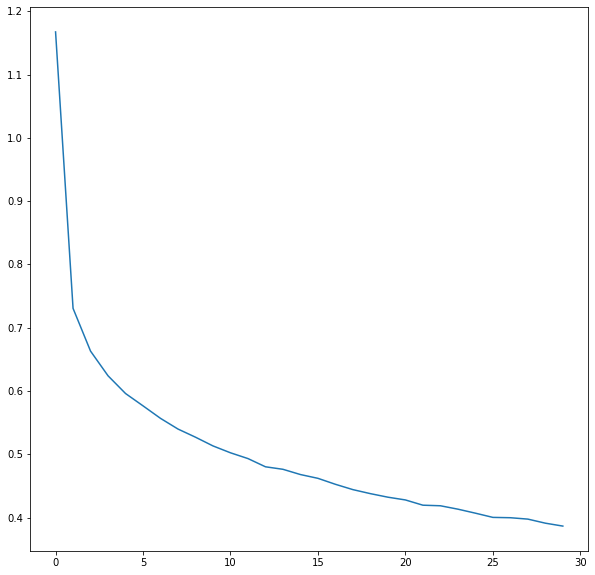

In [21]:
plt.rcParams['figure.figsize'] = 10, 10

plt.plot(list(range(len(model.loss_curve_))), model.loss_curve_)

In [22]:
#Predict the x_test
p = model.predict(x_test)
p = (p > 0.5)
print('ACC: %.3f%%' % (accuracy_score(y_test, p)*100))
print('---------')
print(classification_report(y_test, p))

ACC: 86.520%
---------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.79      0.83      1000
           3       0.94      0.86      0.90      1000
           4       0.88      0.77      0.82      1000
           5       0.98      0.92      0.95      1000
           6       0.69      0.73      0.71      1000
           7       0.94      0.92      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.91      0.97      0.94      1000

   micro avg       0.90      0.87      0.88     10000
   macro avg       0.90      0.87      0.88     10000
weighted avg       0.90      0.87      0.88     10000
 samples avg       0.87      0.87      0.87     10000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
